In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist

### Load MNIST Dataset with train-test split

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


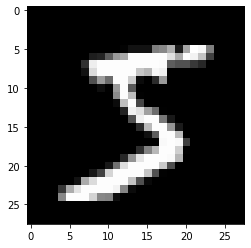

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

5

In [7]:
# one extra dim for color
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
# Normalize Data as intensity is 255
X_train, X_test = X_train/255, X_test/255

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D, Conv2D

def my_convnet_1():
  model = Sequential()

  #32 filters, kernal_size 5X5, input_size = 28X28, activation = ReLU
  model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(16, (3,3), activation='relu'))
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())
  model.add(Dense(100, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax'))

  # How to compute Loss func
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])  #−(ylog(p)+(1−y)log(1−p))

  return model

In [13]:
model = my_convnet_1()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               40100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [15]:
# Training a model wit Hyperparam: epoch, minibatch, no_of_iterations_per_epoch(100) : train_sample(10,000)/minibatch_size(100), activation, number_of_unit, no_layers, learning_rate
# (68.57,17.14,14.0) (48, 12, 10)
history = model.fit(X_train, y_train, epochs=8, validation_split=0.2, batch_size=256, verbose=1, shuffle=True)


Epoch 1/8
188/188 [==============================] - 4s 12ms/step - loss: 0.2875 - accuracy: 0.9075 - val_loss: 0.1224 - val_accuracy: 0.9633
Epoch 2/8
188/188 [==============================] - 2s 10ms/step - loss: 0.1093 - accuracy: 0.9680 - val_loss: 0.0624 - val_accuracy: 0.9837
Epoch 3/8
188/188 [==============================] - 2s 10ms/step - loss: 0.0873 - accuracy: 0.9739 - val_loss: 0.0535 - val_accuracy: 0.9839
Epoch 4/8
188/188 [==============================] - 2s 9ms/step - loss: 0.0785 - accuracy: 0.9758 - val_loss: 0.0512 - val_accuracy: 0.9868
Epoch 5/8
188/188 [==============================] - 2s 10ms/step - loss: 0.0741 - accuracy: 0.9782 - val_loss: 0.0474 - val_accuracy: 0.9867
Epoch 6/8
188/188 [==============================] - 2s 10ms/step - loss: 0.0643 - accuracy: 0.9809 - val_loss: 0.0534 - val_accuracy: 0.9859
Epoch 7/8
188/188 [==============================] - 2s 10ms/step - loss: 0.0684 - accuracy: 0.9798 - val_loss: 0.0523 - val_accuracy: 0.9877
Epoch 8

In [16]:
import inspect
inspect.getmro(type(history))

(keras.callbacks.History, keras.callbacks.Callback, object)

In [17]:
history.history

{'accuracy': [0.9075000286102295,
  0.9680416584014893,
  0.9739375114440918,
  0.9757708311080933,
  0.9781875014305115,
  0.9808750152587891,
  0.979812502861023,
  0.9809374809265137],
 'loss': [0.2874867022037506,
  0.10929985344409943,
  0.08728175610303879,
  0.07845713198184967,
  0.07411670684814453,
  0.06433293223381042,
  0.06839904934167862,
  0.06334315240383148],
 'val_accuracy': [0.9633333086967468,
  0.9837499856948853,
  0.9839166402816772,
  0.9868333339691162,
  0.9866666793823242,
  0.9859166741371155,
  0.9877499938011169,
  0.9889166951179504],
 'val_loss': [0.12237635999917984,
  0.06240314617753029,
  0.05347362905740738,
  0.0511588491499424,
  0.04741746559739113,
  0.053435370326042175,
  0.052273742854595184,
  0.047325339168310165]}

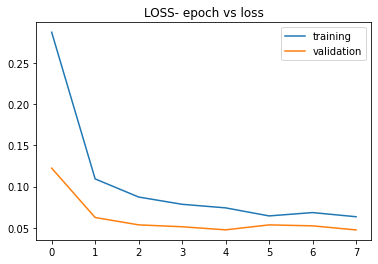

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LOSS- epoch vs loss')
plt.legend(['training','validation'])
plt.show()

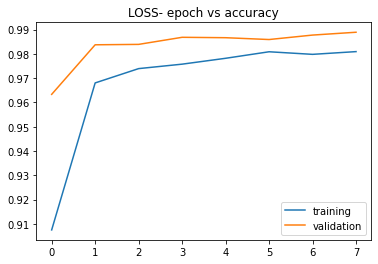

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LOSS- epoch vs accuracy')
plt.legend(['training','validation'])
plt.show()

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)

In [21]:
print('error', score[0])
print('accuracy', score[1])

error 0.031755782663822174
accuracy 0.9908000230789185


In [22]:
# model.save('CCN_model.h5')

In [23]:
# from google.colab import files
# files.download('CCN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>